In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Data Loading**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Loading data
dataset = pd.read_csv('/content/drive/MyDrive/movies_metadata.csv')
dataset.head()

<ipython-input-2-44be669c9a86>:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('/content/drive/MyDrive/movies_metadata.csv')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
keywords = pd.read_csv('/content/drive/MyDrive/keywords.csv')
keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [ ]:
credits = pd.read_csv('/content/drive/MyDrive/credits.csv')
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [ ]:
print(dataset.shape)
print(keywords.shape)
print(credits.shape)

(45466, 24)
(46419, 2)
(45476, 3)


**Data Cleansing**

In [ ]:
keywords['id'] = keywords['id'].astype('int')
credits['id'] = credits['id'].astype('int')

In [ ]:
for i in dataset['id']:
  if len(i) > 7:
    print(i)
    #We need to drop data from dataset that id == i
    dataset = dataset[dataset['id'] != i]

1997-08-20
2012-09-29
2014-01-01


In [ ]:
dataset['id'] = dataset['id'].astype('int')

In [ ]:
dataset = dataset.merge(credits, on='id')
dataset = dataset.merge(keywords, on='id')

In [ ]:
dataset.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [ ]:
df = dataset.drop_duplicates(subset='id')
df.shape

(45432, 27)

In [ ]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'cast', 'crew', 'keywords'],
      dtype='object')

In [ ]:
selected_columns = ['budget', 'genres', 'id', 'original_language', 'overview', 'popularity', 'production_companies', 'revenue', 'spoken_languages', 'tagline', 'title', 'vote_average', 'cast', 'crew', 'keywords']
df_selected = df[selected_columns]

In [ ]:
df_selected.head()

,budget,genres,id,original_language,overview,popularity,production_companies,revenue,spoken_languages,tagline,title,vote_average,cast,crew,keywords
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]",373554033.0,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,Toy Story,7.7,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",262797249.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Roll the dice and unleash the excitement!,Jumanji,6.9,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,81452156.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Friends are the people who let you be yourself...,Waiting to Exhale,6.1,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...",76578911.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [ ]:
def fill_nan_values(df):
    for column in df.select_dtypes(include=['object']).columns:
        df[column].fillna('', inplace=True)

    for column in df.select_dtypes(include=['number']).columns:
        df[column].fillna(df[column].mean(), inplace=True)

    return df

df_cleaned = fill_nan_values(df_selected)

<ipython-input-15-604df953ab7d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].fillna('', inplace=True)
<ipython-input-15-604df953ab7d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].fillna(df[column].mean(), inplace=True)


In [ ]:
df_cleaned.head()

,budget,genres,id,original_language,overview,popularity,production_companies,revenue,spoken_languages,tagline,title,vote_average,cast,crew,keywords
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]",373554033.0,"[{'iso_639_1': 'en', 'name': 'English'}]",,Toy Story,7.7,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",262797249.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Roll the dice and unleash the excitement!,Jumanji,6.9,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,81452156.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Friends are the people who let you be yourself...,Waiting to Exhale,6.1,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...",76578911.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [ ]:
df_cleaned['budget'] = df_cleaned['budget'].astype('int')
df_cleaned['revenue'] = df_cleaned['revenue'].astype('int')

<ipython-input-17-11a8c0630e9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['budget'] = df_cleaned['budget'].astype('int')
<ipython-input-17-11a8c0630e9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['revenue'] = df_cleaned['revenue'].astype('int')


In [ ]:
mean_budget = df_cleaned['budget'].mean()
for i in df_cleaned['budget']:
  if i == 0:
    df_cleaned['budget'] = df_cleaned['budget'].replace(i, mean_budget)

mean_revenue = df_cleaned['revenue'].mean()
for i in df_cleaned['revenue']:
  if i == 0:
    df_cleaned['revenue'] = df_cleaned['revenue'].replace(i, mean_revenue)

<ipython-input-18-a599d712d0aa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['budget'] = df_cleaned['budget'].replace(i, mean_budget)
<ipython-input-18-a599d712d0aa>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['revenue'] = df_cleaned['revenue'].replace(i, mean_revenue)


In [ ]:
df_cleaned.head()

,budget,genres,id,original_language,overview,popularity,production_companies,revenue,spoken_languages,tagline,title,vote_average,cast,crew,keywords
0,3.000000e+07,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]",3.735540e+08,"[{'iso_639_1': 'en', 'name': 'English'}]",,Toy Story,7.7,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,6.500000e+07,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",2.627972e+08,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Roll the dice and unleash the excitement!,Jumanji,6.9,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,4.224642e+06,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",1.121313e+07,"[{'iso_639_1': 'en', 'name': 'English'}]",Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,1.600000e+07,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,8.145216e+07,"[{'iso_639_1': 'en', 'name': 'English'}]",Friends are the people who let you be yourself...,Waiting to Exhale,6.1,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,4.224642e+06,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...",7.657891e+07,"[{'iso_639_1': 'en', 'name': 'English'}]",Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


**Data Preprocessing**

In [ ]:
df_cleaned['genres'][0]

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [ ]:
import ast

In [ ]:
def extract_genres(genres):
  genres_list = []
  for i in ast.literal_eval(genres):
    genres_list.append(i['name'])
  return genres_list

df_cleaned['genres'] = df_cleaned['genres'].apply(extract_genres)

<ipython-input-22-8e53d0eae8d2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['genres'] = df_cleaned['genres'].apply(extract_genres)


In [ ]:
df_cleaned['genres'][0]

['Animation', 'Comedy', 'Family']

In [ ]:
df_ohe_genres = df_cleaned['genres'].str.join('|').str.get_dummies()
df_ohe_genres

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46623,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
46624,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
46625,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
46626,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_cleaned['production_companies'][0]

"[{'name': 'Pixar Animation Studios', 'id': 3}]"

In [ ]:
def extract_production_companies(production_companies):
    if pd.isna(production_companies) or production_companies == '[]':
        return []
    try:
        production_companies_list = []
        for i in ast.literal_eval(production_companies):
            production_companies_list.append(i['name'])
        return production_companies_list
    except (SyntaxError, ValueError):
        return []

In [ ]:
df_cleaned['production_companies'] = df_cleaned['production_companies'].apply(extract_production_companies)

<ipython-input-27-39040aac4020>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['production_companies'] = df_cleaned['production_companies'].apply(extract_production_companies)


In [ ]:
df_cleaned['production_companies']

0                                [Pixar Animation Studios]
1        [TriStar Pictures, Teitler Film, Interscope Co...
2                           [Warner Bros., Lancaster Gate]
3                 [Twentieth Century Fox Film Corporation]
4             [Sandollar Productions, Touchstone Pictures]
                               ...                        
46623                                                   []
46624                                        [Sine Olivia]
46625                            [American World Pictures]
46626                                          [Yermoliev]
46627                                                   []
Name: production_companies, Length: 45432, dtype: object

In [ ]:
df_cleaned['production_companies'] = df_cleaned['production_companies'].apply(lambda x: x if x else [''])
df_cleaned['production_companies']

<ipython-input-29-37f85e3042cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['production_companies'] = df_cleaned['production_companies'].apply(lambda x: x if x else [''])


0                                [Pixar Animation Studios]
1        [TriStar Pictures, Teitler Film, Interscope Co...
2                           [Warner Bros., Lancaster Gate]
3                 [Twentieth Century Fox Film Corporation]
4             [Sandollar Productions, Touchstone Pictures]
                               ...                        
46623                                                   []
46624                                        [Sine Olivia]
46625                            [American World Pictures]
46626                                          [Yermoliev]
46627                                                   []
Name: production_companies, Length: 45432, dtype: object

In [ ]:
from collections import Counter

def replace_less_common_with_others(column, top_n):
    flat_list = [item for sublist in column for item in sublist]
    counts = Counter(flat_list)

    most_common = set([item for item, count in counts.most_common(top_n)])

    column_replaced = column.apply(lambda x: [item if item in most_common else 'others' for item in x])

    return column_replaced

df_cleaned['production_companies'] = replace_less_common_with_others(df_cleaned['production_companies'], top_n=20)

df_cleaned['production_companies']

<ipython-input-30-cbe4d91daf7b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['production_companies'] = replace_less_common_with_others(df_cleaned['production_companies'], top_n=20)


0                                        [others]
1              [TriStar Pictures, others, others]
2                          [Warner Bros., others]
3        [Twentieth Century Fox Film Corporation]
4                   [others, Touchstone Pictures]
                           ...                   
46623                                          []
46624                                    [others]
46625                                    [others]
46626                                    [others]
46627                                          []
Name: production_companies, Length: 45432, dtype: object

In [ ]:
df_ohe_production_companies = df_cleaned['production_companies'].str.join('|').str.get_dummies()
df_ohe_production_companies

,Canal+,Centre National de la Cinématographie (CNC),Columbia Pictures,Columbia Pictures Corporation,France 2 Cinéma,Metro-Goldwyn-Mayer (MGM),Miramax Films,Mosfilm,New Line Cinema,Paramount Pictures,RKO Radio Pictures,Toho Company,Touchstone Pictures,TriStar Pictures,Twentieth Century Fox Film Corporation,United Artists,Universal Pictures,Walt Disney Pictures,Warner Bros.,others
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46623,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
46624,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
46625,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
46626,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
def extract_spoken_language(spoken_languages):
    if pd.isna(spoken_languages) or spoken_languages == '[]':
        return []
    try:
        spoken_languages_list = []
        for i in ast.literal_eval(spoken_languages):
            spoken_languages_list.append(i['name'])
        return spoken_languages_list
    except (SyntaxError, ValueError):
        return []

df_cleaned['spoken_languages'] = df_cleaned['spoken_languages'].apply(extract_spoken_language)

<ipython-input-32-1b11d9653d98>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['spoken_languages'] = df_cleaned['spoken_languages'].apply(extract_spoken_language)


In [ ]:
df_ohe_spoken_languages = df_cleaned['spoken_languages'].str.join('|').str.get_dummies()
df_ohe_spoken_languages

,?????,??????,Afrikaans,Azərbaycan,Bahasa indonesia,Bahasa melayu,Bamanankan,Bokmål,Bosanski,Català,...,বাংলা,ਪੰਜਾਬੀ,தமிழ்,తెలుగు,ภาษาไทย,ქართული,广州话 / 廣州話,日本語,普通话,한국어/조선말
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46623,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46624,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46625,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46626,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
ast.literal_eval(df_cleaned['cast'][0])

[{'cast_id': 14,
  'character': 'Woody (voice)',
  'credit_id': '52fe4284c3a36847f8024f95',
  'gender': 2,
  'id': 31,
  'name': 'Tom Hanks',
  'order': 0,
  'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'},
 {'cast_id': 15,
  'character': 'Buzz Lightyear (voice)',
  'credit_id': '52fe4284c3a36847f8024f99',
  'gender': 2,
  'id': 12898,
  'name': 'Tim Allen',
  'order': 1,
  'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'},
 {'cast_id': 16,
  'character': 'Mr. Potato Head (voice)',
  'credit_id': '52fe4284c3a36847f8024f9d',
  'gender': 2,
  'id': 7167,
  'name': 'Don Rickles',
  'order': 2,
  'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'},
 {'cast_id': 17,
  'character': 'Slinky Dog (voice)',
  'credit_id': '52fe4284c3a36847f8024fa1',
  'gender': 2,
  'id': 12899,
  'name': 'Jim Varney',
  'order': 3,
  'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'},
 {'cast_id': 18,
  'character': 'Rex (voice)',
  'credit_id': '52fe4284c3a36847f8024fa5',
  'gender': 2,
  'id': 12900,
 

In [ ]:
def extract_cast(cast):
    if pd.isna(cast) or cast == '[]':
        return []
    try:
        cast_list = []
        for i in ast.literal_eval(cast):
            cast_list.append(i['name'])
        return cast_list
    except (SyntaxError, ValueError):
        return []

df_cleaned['cast'] = df_cleaned['cast'].apply(extract_cast)

<ipython-input-35-27f223edfcca>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['cast'] = df_cleaned['cast'].apply(extract_cast)


In [ ]:
df_cleaned['cast'] = replace_less_common_with_others(df_cleaned['cast'], top_n=200)

df_cleaned['cast']

<ipython-input-36-784758c6e821>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['cast'] = replace_less_common_with_others(df_cleaned['cast'], top_n=200)


0        [Tom Hanks, others, others, others, Wallace Sh...
1        [Robin Williams, others, others, others, other...
2        [others, others, others, others, others, other...
3        [others, others, others, others, others, other...
4        [others, others, others, others, others, other...
                               ...                        
46623                             [others, others, others]
46624    [others, others, others, others, others, other...
46625    [others, others, others, James Remar, others, ...
46626             [others, others, others, others, others]
46627                                                   []
Name: cast, Length: 45432, dtype: object

In [ ]:
df_ohe_cast = df_cleaned['cast'].str.join('|').str.get_dummies()
df_ohe_cast

,Alan Arkin,Alan Hale,Alec Baldwin,Alfred Molina,Anthony Hopkins,Anthony Quinn,Antonio Banderas,Barbara Stanwyck,Ben Kingsley,Ben Stiller,...,Vincent Price,Ving Rhames,Wallace Shawn,Ward Bond,Whoopi Goldberg,Willem Dafoe,William H. Macy,William Hurt,Woody Harrelson,others
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46623,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
46624,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
46625,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
46626,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
ast.literal_eval(df_cleaned['crew'][0])

[{'credit_id': '52fe4284c3a36847f8024f49',
  'department': 'Directing',
  'gender': 2,
  'id': 7879,
  'job': 'Director',
  'name': 'John Lasseter',
  'profile_path': '/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f4f',
  'department': 'Writing',
  'gender': 2,
  'id': 12891,
  'job': 'Screenplay',
  'name': 'Joss Whedon',
  'profile_path': '/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f55',
  'department': 'Writing',
  'gender': 2,
  'id': 7,
  'job': 'Screenplay',
  'name': 'Andrew Stanton',
  'profile_path': '/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f5b',
  'department': 'Writing',
  'gender': 2,
  'id': 12892,
  'job': 'Screenplay',
  'name': 'Joel Cohen',
  'profile_path': '/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f61',
  'department': 'Writing',
  'gender': 0,
  'id': 12893,
  'job': 'Screenplay',
  'name': 'Alec Sokolow',
  'profile_path': '/v79vlRYi94BZUQnkkyzn

In [ ]:
def extract_crew(crew):
    if pd.isna(crew) or crew == '[]':
        return []
    try:
        crew_list = []
        for i in ast.literal_eval(crew):
          if i['job'] == 'Director':
            crew_list.append(i['name'])
        return crew_list

    except (SyntaxError, ValueError):
        return []

df_cleaned['crew'] = df_cleaned['crew'].apply(extract_crew)

<ipython-input-39-3fb0b5c5e043>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['crew'] = df_cleaned['crew'].apply(extract_crew)


In [ ]:
df_cleaned['crew'] = replace_less_common_with_others(df_cleaned['crew'], top_n=200)

df_cleaned['crew']

<ipython-input-40-ffbfe2df40ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['crew'] = replace_less_common_with_others(df_cleaned['crew'], top_n=200)


0        [others]
1        [others]
2        [others]
3        [others]
4        [others]
           ...   
46623    [others]
46624    [others]
46625    [others]
46626    [others]
46627    [others]
Name: crew, Length: 45432, dtype: object

In [ ]:
df_ohe_crew = df_cleaned['crew'].str.join('|').str.get_dummies()
df_ohe_crew

,Abbas Kiarostami,Abel Ferrara,Aki Kaurismäki,Akira Kurosawa,Alain Resnais,Albert Pyun,Alex Gibney,Alfred Hitchcock,Allan Dwan,Anatole Litvak,...,William Dieterle,William K.L. Dickson,William Keighley,William Wyler,Wim Wenders,Woody Allen,Yasujirō Ozu,Zhang Yimou,others,Éric Rohmer
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46623,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
46624,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
46625,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
46626,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
ast.literal_eval(df_cleaned['keywords'][0])

[{'id': 931, 'name': 'jealousy'},
 {'id': 4290, 'name': 'toy'},
 {'id': 5202, 'name': 'boy'},
 {'id': 6054, 'name': 'friendship'},
 {'id': 9713, 'name': 'friends'},
 {'id': 9823, 'name': 'rivalry'},
 {'id': 165503, 'name': 'boy next door'},
 {'id': 170722, 'name': 'new toy'},
 {'id': 187065, 'name': 'toy comes to life'}]

In [ ]:
def extract_keywords(keywords):
    if pd.isna(keywords) or keywords == '[]':
        return []
    try:
        keywords_list = []
        for i in ast.literal_eval(keywords):
            keywords_list.append(i['name'])
        return keywords_list

    except (SyntaxError, ValueError):
        return []

df_cleaned['keywords'] = df_cleaned['keywords'].apply(extract_keywords)

<ipython-input-43-ab95e589e3fe>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['keywords'] = df_cleaned['keywords'].apply(extract_keywords)


In [ ]:
df_cleaned['keywords'] = replace_less_common_with_others(df_cleaned['keywords'], top_n=200)

df_cleaned['keywords']

<ipython-input-44-5f1605349328>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['keywords'] = replace_less_common_with_others(df_cleaned['keywords'], top_n=200)


0        [jealousy, others, others, friendship, friends...
1         [others, others, others, others, others, others]
2        [others, best friend, duringcreditsstinger, ot...
3        [based on novel, others, others, divorce, others]
4        [baby, others, others, others, daughter, mothe...
                               ...                        
46623                                             [others]
46624                             [others, others, others]
46625                                                   []
46626                                                   []
46627                                                   []
Name: keywords, Length: 45432, dtype: object

In [ ]:
df_ohe_keywords = df_cleaned['keywords'].str.join('|').str.get_dummies()
df_ohe_keywords

,1970s,3d,adultery,africa,aftercreditsstinger,airplane,alcohol,alien,animation,anime,...,violence,war,wedding,widow,wife husband relationship,witch,woman director,world war ii,writer,zombie
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46623,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46624,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46625,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46626,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_cleaned

,budget,genres,id,original_language,overview,popularity,production_companies,revenue,spoken_languages,tagline,title,vote_average,cast,crew,keywords
0,3.000000e+07,"[Animation, Comedy, Family]",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,[others],3.735540e+08,[English],,Toy Story,7.7,"[Tom Hanks, others, others, others, Wallace Sh...",[others],"[jealousy, others, others, friendship, friends..."
1,6.500000e+07,"[Adventure, Fantasy, Family]",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, others, others]",2.627972e+08,"[English, Français]",Roll the dice and unleash the excitement!,Jumanji,6.9,"[Robin Williams, others, others, others, other...",[others],"[others, others, others, others, others, others]"
2,4.224642e+06,"[Romance, Comedy]",15602,en,A family wedding reignites the ancient feud be...,11.7129,"[Warner Bros., others]",1.121313e+07,[English],Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,"[others, others, others, others, others, other...",[others],"[others, best friend, duringcreditsstinger, ot..."
3,1.600000e+07,"[Comedy, Drama, Romance]",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[Twentieth Century Fox Film Corporation],8.145216e+07,[English],Friends are the people who let you be yourself...,Waiting to Exhale,6.1,"[others, others, others, others, others, other...",[others],"[based on novel, others, others, divorce, others]"
4,4.224642e+06,[Comedy],11862,en,Just when George Banks has recovered from his ...,8.387519,"[others, Touchstone Pictures]",7.657891e+07,[English],Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,"[others, others, others, others, others, other...",[others],"[baby, others, others, others, daughter, mothe..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46623,4.224642e+06,"[Drama, Family]",439050,fa,Rising and falling between a man and woman.,0.072051,[],1.121313e+07,[فارسی],Rising and falling between a man and woman,Subdue,4.0,"[others, others, others]",[others],[others]
46624,4.224642e+06,[Drama],111109,tl,An artist struggles to finish his work while a...,0.178241,[others],1.121313e+07,[],,Century of Birthing,9.0,"[others, others, others, others, others, other...",[others],"[others, others, others]"
46625,4.224642e+06,"[Action, Drama, Thriller]",67758,en,"When one of her hits goes wrong, a professiona...",0.903007,[others],1.121313e+07,[English],A deadly game of wits.,Betrayal,3.8,"[others, others, others, James Remar, others, ...",[others],[]
46626,4.224642e+06,[],227506,en,"In a small town live two brothers, one a minis...",0.003503,[others],1.121313e+07,[],,Satan Triumphant,0.0,"[others, others, others, others, others]",[others],[]


In [ ]:
df_concat = pd.concat([df_cleaned, df_ohe_genres, df_ohe_production_companies, df_ohe_spoken_languages, df_ohe_cast, df_ohe_crew, df_ohe_keywords], axis=1)
df_concat

,budget,genres,id,original_language,overview,popularity,production_companies,revenue,spoken_languages,tagline,...,violence,war,wedding,widow,wife husband relationship,witch,woman director,world war ii,writer,zombie
0,3.000000e+07,"[Animation, Comedy, Family]",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,[others],3.735540e+08,[English],,...,0,0,0,0,0,0,0,0,0,0
1,6.500000e+07,"[Adventure, Fantasy, Family]",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, others, others]",2.627972e+08,"[English, Français]",Roll the dice and unleash the excitement!,...,0,0,0,0,0,0,0,0,0,0
2,4.224642e+06,"[Romance, Comedy]",15602,en,A family wedding reignites the ancient feud be...,11.7129,"[Warner Bros., others]",1.121313e+07,[English],Still Yelling. Still Fighting. Still Ready for...,...,0,0,0,0,0,0,0,0,0,0
3,1.600000e+07,"[Comedy, Drama, Romance]",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[Twentieth Century Fox Film Corporation],8.145216e+07,[English],Friends are the people who let you be yourself...,...,0,0,0,0,0,0,0,0,0,0
4,4.224642e+06,[Comedy],11862,en,Just when George Banks has recovered from his ...,8.387519,"[others, Touchstone Pictures]",7.657891e+07,[English],Just When His World Is Back To Normal... He's ...,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46623,4.224642e+06,"[Drama, Family]",439050,fa,Rising and falling between a man and woman.,0.072051,[],1.121313e+07,[فارسی],Rising and falling between a man and woman,...,0,0,0,0,0,0,0,0,0,0
46624,4.224642e+06,[Drama],111109,tl,An artist struggles to finish his work while a...,0.178241,[others],1.121313e+07,[],,...,0,0,0,0,0,0,0,0,0,0
46625,4.224642e+06,"[Action, Drama, Thriller]",67758,en,"When one of her hits goes wrong, a professiona...",0.903007,[others],1.121313e+07,[English],A deadly game of wits.,...,0,0,0,0,0,0,0,0,0,0
46626,4.224642e+06,[],227506,en,"In a small town live two brothers, one a minis...",0.003503,[others],1.121313e+07,[],,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_concat.drop(['genres', 'production_companies', 'spoken_languages', 'cast', 'crew', 'keywords'], axis=1, inplace=True)

In [ ]:
df_concat.drop(['id', 'original_language'], axis = 1, inplace = True)

In [ ]:
df_concat

,budget,overview,popularity,revenue,tagline,title,vote_average,Action,Adventure,Animation,...,violence,war,wedding,widow,wife husband relationship,witch,woman director,world war ii,writer,zombie
0,3.000000e+07,"Led by Woody, Andy's toys live happily in his ...",21.946943,3.735540e+08,,Toy Story,7.7,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,6.500000e+07,When siblings Judy and Peter discover an encha...,17.015539,2.627972e+08,Roll the dice and unleash the excitement!,Jumanji,6.9,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,4.224642e+06,A family wedding reignites the ancient feud be...,11.7129,1.121313e+07,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.600000e+07,"Cheated on, mistreated and stepped on, the wom...",3.859495,8.145216e+07,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.224642e+06,Just when George Banks has recovered from his ...,8.387519,7.657891e+07,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46623,4.224642e+06,Rising and falling between a man and woman.,0.072051,1.121313e+07,Rising and falling between a man and woman,Subdue,4.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46624,4.224642e+06,An artist struggles to finish his work while a...,0.178241,1.121313e+07,,Century of Birthing,9.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46625,4.224642e+06,"When one of her hits goes wrong, a professiona...",0.903007,1.121313e+07,A deadly game of wits.,Betrayal,3.8,1,0,0,...,0,0,0,0,0,0,0,0,0,0
46626,4.224642e+06,"In a small town live two brothers, one a minis...",0.003503,1.121313e+07,,Satan Triumphant,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Cleansing and normalize popularity column

In [ ]:
df_concat['popularity'] = df_concat['popularity'].replace('', '0')

df_concat['popularity'] = df_concat['popularity'].astype(float)

mean_value = df_concat['popularity'].replace(0, np.nan).mean()

df_concat['popularity'] = df_concat['popularity'].replace(0, mean_value)

df_concat['popularity'] = (df_concat['popularity'] - df_concat['popularity'].min()) / (df_concat['popularity'].max() - df_concat['popularity'].min())

df_concat['popularity']

0        0.040087
1        0.031079
2        0.021394
3        0.007049
4        0.015320
           ...   
46623    0.000132
46624    0.000326
46625    0.001649
46626    0.000006
46627    0.000298
Name: popularity, Length: 45432, dtype: float64

In [ ]:
df_concat['text'] = df_concat['overview'] + ' ' + df_concat['tagline']

In [ ]:
df_concat.reset_index(drop=True, inplace=True)

In [ ]:
df_concat

,budget,overview,popularity,revenue,tagline,title,vote_average,Action,Adventure,Animation,...,war,wedding,widow,wife husband relationship,witch,woman director,world war ii,writer,zombie,text
0,3.000000e+07,"Led by Woody, Andy's toys live happily in his ...",0.040087,3.735540e+08,,Toy Story,7.7,0,0,1,...,0,0,0,0,0,0,0,0,0,"Led by Woody, Andy's toys live happily in his ..."
1,6.500000e+07,When siblings Judy and Peter discover an encha...,0.031079,2.627972e+08,Roll the dice and unleash the excitement!,Jumanji,6.9,0,1,0,...,0,0,0,0,0,0,0,0,0,When siblings Judy and Peter discover an encha...
2,4.224642e+06,A family wedding reignites the ancient feud be...,0.021394,1.121313e+07,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,0,0,0,...,0,0,0,0,0,0,0,0,0,A family wedding reignites the ancient feud be...
3,1.600000e+07,"Cheated on, mistreated and stepped on, the wom...",0.007049,8.145216e+07,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,0,0,0,...,0,0,0,0,0,0,0,0,0,"Cheated on, mistreated and stepped on, the wom..."
4,4.224642e+06,Just when George Banks has recovered from his ...,0.015320,7.657891e+07,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,0,0,0,...,0,0,0,0,0,0,0,0,0,Just when George Banks has recovered from his ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45427,4.224642e+06,Rising and falling between a man and woman.,0.000132,1.121313e+07,Rising and falling between a man and woman,Subdue,4.0,0,0,0,...,0,0,0,0,0,0,0,0,0,Rising and falling between a man and woman. Ri...
45428,4.224642e+06,An artist struggles to finish his work while a...,0.000326,1.121313e+07,,Century of Birthing,9.0,0,0,0,...,0,0,0,0,0,0,0,0,0,An artist struggles to finish his work while a...
45429,4.224642e+06,"When one of her hits goes wrong, a professiona...",0.001649,1.121313e+07,A deadly game of wits.,Betrayal,3.8,1,0,0,...,0,0,0,0,0,0,0,0,0,"When one of her hits goes wrong, a professiona..."
45430,4.224642e+06,"In a small town live two brothers, one a minis...",0.000006,1.121313e+07,,Satan Triumphant,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,"In a small town live two brothers, one a minis..."


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = vectorizer.fit_transform(df_concat['text'])

In [ ]:
tfidf_matrix

<45432x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 1265755 stored elements in Compressed Sparse Row format>

In [ ]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df

,000,10,12,20,abandoned,able,about,accident,accidentally,accused,...,wrong,year,years,yet,york,you,young,younger,your,youth
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.121742,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.291714,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45427,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
45428,0.0,0.0,0.0,0.0,0.0,0.0,0.236812,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
45429,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.290767,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
45430,0.0,0.0,0.0,0.0,0.0,0.0,0.074048,0.123136,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [ ]:
df_concat2 = pd.concat([df_concat, tfidf_df], axis=1)

In [ ]:
df_to_cluster = df_concat2.drop(['overview', 'tagline'], axis=1)

In [ ]:
df_to_cluster['vote_average'] = df_to_cluster['vote_average'].astype(float)

In [ ]:
df_to_cluster = df_to_cluster.drop(['text', 'title'], axis=1)

In [ ]:
df_to_cluster

,budget,popularity,revenue,vote_average,Action,Adventure,Animation,Comedy,Crime,Documentary,...,wrong,year,years,yet,york,you,young,younger,your,youth
0,3.000000e+07,0.040087,3.735540e+08,7.7,0,0,1,1,0,0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,6.500000e+07,0.031079,2.627972e+08,6.9,0,1,0,0,0,0,...,0.000000,0.0,0.121742,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,4.224642e+06,0.021394,1.121313e+07,6.5,0,0,0,1,0,0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,1.600000e+07,0.007049,8.145216e+07,6.1,0,0,0,1,0,0,...,0.000000,0.0,0.000000,0.0,0.0,0.291714,0.0,0.0,0.0,0.0
4,4.224642e+06,0.015320,7.657891e+07,5.7,0,0,0,1,0,0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45427,4.224642e+06,0.000132,1.121313e+07,4.0,0,0,0,0,0,0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
45428,4.224642e+06,0.000326,1.121313e+07,9.0,0,0,0,0,0,0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
45429,4.224642e+06,0.001649,1.121313e+07,3.8,1,0,0,0,0,0,...,0.290767,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
45430,4.224642e+06,0.000006,1.121313e+07,0.0,0,0,0,0,0,0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [ ]:
df_to_cluster.to_csv('df_to_cluster.csv', index=False)

**Training**

Baseline: KMeans clustering

In [64]:
#import libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
#Kmeans Clustering
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
for n_clusters in range_n_clusters:
    #Initializing the clusterer with n_clusters value and a random   generator
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_to_cluster)
    #The silhouette_score gives the average value for all the   samples.
    #Calculating number of clusters
    silhouette_avg = silhouette_score(df_to_cluster, cluster_labels)
    print("For n_clusters =", n_clusters,"The average   silhoutte_score is :", silhouette_avg)
    # #Using Silhouette Plot
    # visualizer = SilhouetteVisualizer(clusterer,colors =  'yellowbrick')
    # #Fit the data to the visualizer
    # visualizer.fit(df_to_cluster)
    # #Render the figure
    # visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average   silhoutte_score is : 0.9659453353510958


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average   silhoutte_score is : 0.9488693275105652


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average   silhoutte_score is : 0.9352425936507991


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average   silhoutte_score is : 0.9328903849257314


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average   silhoutte_score is : 0.9262919627043037


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7 The average   silhoutte_score is : 0.9167292710512818


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8 The average   silhoutte_score is : 0.9101287933662733


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9 The average   silhoutte_score is : 0.8897797317117745


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10 The average   silhoutte_score is : 0.888955481339378


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 11 The average   silhoutte_score is : 0.8983065187293192


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 12 The average   silhoutte_score is : 0.8948194042677554


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 13 The average   silhoutte_score is : 0.8948390416525347


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 14 The average   silhoutte_score is : 0.8947927610933015


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 15 The average   silhoutte_score is : 0.8940629357359651


Elbow method

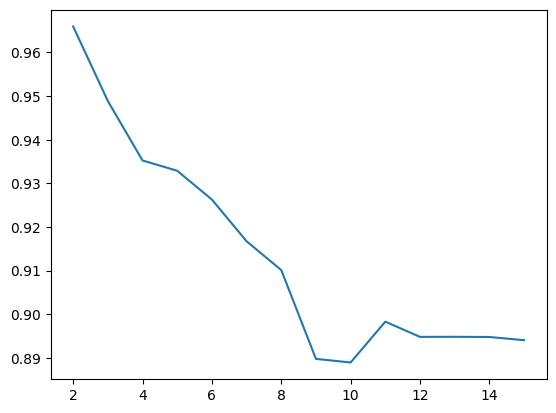

In [125]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
ypoints = np.array([0.9659453353510958, 0.9488693275105652, 0.9352425936507991, 0.9328903849257314, 0.9262919627043037, 0.9167292710512818, 0.9101287933662733, 0.8897797317117745, 0.888955481339378, 0.8983065187293192, 0.8948194042677554, 0.8948390416525347, 0.8947927610933015, 0.8940629357359651])

plt.plot(xpoints, ypoints)
plt.show()

In [68]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Initializing the clusterer with n_clusters value and a random   generator
clusterer = KMeans(n_clusters=9, random_state=10)
cluster_labels = clusterer.fit_predict(df_to_cluster)

silhouette_avg = silhouette_score(df_to_cluster, cluster_labels)
print("For n_clusters =", 9,"The average   silhoutte_score is :", silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9 The average   silhoutte_score is : 0.8897797317117745


Apply DBSCAN clustering

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

#Implement dbscan clustering
db = DBSCAN(eps=0.3, min_samples=10).fit(df_to_cluster)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

In [ ]:
sc = metrics.silhouette_score(df_to_cluster, labels)
print("Silhouette Coefficient: ", sc)

In this case: KMeans is better

**Test Prediction**

In [101]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances

def find_most_relatable_movies(movie_indices, movie_features, kmeans_model, n_recommendations=3):
    # Get the cluster labels for each movie
    cluster_labels = kmeans_model.predict(movie_features)

    relatable_movies_pre = []
    relatable_movies = []

    for movie_index in movie_indices:
        # Get the cluster label for the current input movie
        cluster_label = cluster_labels[movie_index]

        # Get all movies in the same cluster
        cluster_indices = np.where(cluster_labels == cluster_label)[0]

        # Calculate the distances between the input movie and other movies in the same cluster
        distances = euclidean_distances(movie_features[movie_index].reshape(1, -1), movie_features[cluster_indices])

        # Get indices of the closest movies within the cluster (excluding the input movie itself)
        sorted_indices = np.argsort(distances[0])

        # Select the top n_recommendations (excluding the input movie itself)
        top_indices = cluster_indices[sorted_indices][1:n_recommendations+1]

        relatable_movies_pre.extend(top_indices)

    for i in range(3):
      relatable_movies.append(relatable_movies_pre[i])

    return relatable_movies


input_movie_indices = [0, 12, 24191]

recommendations = find_most_relatable_movies(input_movie_indices, df_to_cluster.values, clusterer)
print("Recommended movie indices:", recommendations)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


Recommended movie indices: [588, 1813, 1225]


In [102]:
print("Input movies:")
for i in input_movie_indices:
  print(df_cleaned['title'][i])

print()
print("Recommendation movies:")
for i in recommendations:
  print(df_cleaned['title'][i])

Input movies:
Toy Story
Balto
The Boxtrolls

Recommendation movies:
Beauty and the Beast
There's Something About Mary
Back to the Future


In [103]:
print("Input movies:")
for i in input_movie_indices:
  print(df_cleaned.iloc[i])

print()
print("Recommendation movies:")
for i in recommendations:
  print(df_cleaned.iloc[i])

Input movies:
budget                                                         30000000.0
genres                                        [Animation, Comedy, Family]
id                                                                    862
original_language                                                      en
overview                Led by Woody, Andy's toys live happily in his ...
popularity                                                      21.946943
production_companies                                             [others]
revenue                                                       373554033.0
spoken_languages                                                [English]
tagline                                                                  
title                                                           Toy Story
vote_average                                                          7.7
cast                    [Tom Hanks, others, others, others, Wallace Sh...
crew                    

In [104]:
df_cleaned.to_csv('df_cleaned.csv', index=False)

**Export cluster and cluster labels to use**

In [105]:
import joblib

joblib.dump(clusterer, 'kmeans_model.pkl')

cluster_labels = clusterer.labels_
joblib.dump(cluster_labels, 'cluster_labels.pkl')

['cluster_labels.pkl']